## importing packages

In [1]:
#importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#keras
from keras import *
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Flatten
from keras.optimizers import  Adam
from keras import regularizers

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Precessing with datas

In [4]:
#importing Malayalam datasets
train=pd.read_csv('/content/drive/MyDrive/project/main/Trials/Dataset/Mal_sentiment_full_train.tsv',sep='\t')
dev=pd.read_csv('/content/drive/MyDrive/project/main/Trials/Dataset/Mal_sentiment_full_dev.tsv',sep='\t')
test=pd.read_csv('/content/drive/MyDrive/project/main/Trials/Dataset/Mal_sentiment_full_test_withoutlabels.tsv',sep='\t')

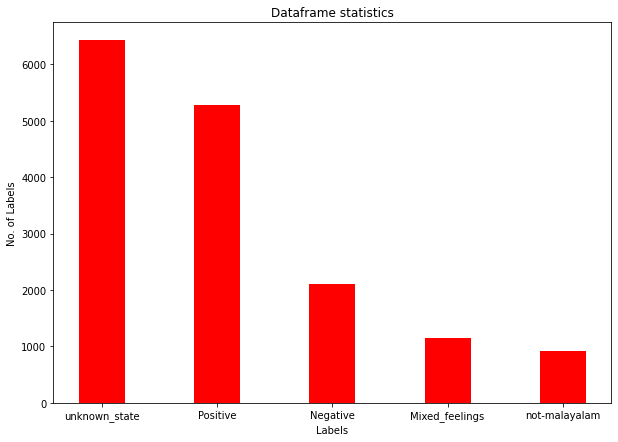

Positive          6421
unknown_state     5279
Negative          2105
not-malayalam     1157
Mixed_feelings     926
Name: category, dtype: int64

In [5]:
#Fitting Labels
train['category'] = train['category'].str.strip()

#Visualizing datas
Labels =  train['category'].unique()
count =   train['category'].value_counts()
  
fig = plt.figure(figsize = (10, 7))

# creating the bar plot
plt.bar(Labels, count, color ='red',  width = 0.4)
 
plt.xlabel("Labels")
plt.ylabel("No. of Labels")
plt.title("Dataframe statistics")
plt.show()

#Label counts
train['category'].value_counts()

## Removing punctuations

In [6]:
#removing punctuations
import string
def remove_punctuations(txt):
    text_nopunc="".join([c for c in txt if c not in string.punctuation])
    return text_nopunc

train['text']=train['text'].apply(lambda x: remove_punctuations(x))



In [7]:
#Label encoder
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()
train['category']=Encoder.fit_transform(train['category'])
dev['category']= Encoder.fit_transform(dev['category'])

In [8]:
train['category'].value_counts()

2    6421
4    5279
1    2105
3    1157
0     926
Name: category, dtype: int64

# **Models**

# Multilayer Perceptron

In [9]:
from keras.preprocessing.text import one_hot

#use onehot in train
voc_size = 1000

train_onehot = [one_hot(words, voc_size)for words in train['text']]
dev_onehot = [one_hot(words, voc_size)for words in dev['text']]
test_onehot = [one_hot(words, voc_size)for words in test['text']]

In [10]:
#from keras.layers import Embedding
#from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences

sent_length = 30
embedded_train = pad_sequences(train_onehot,padding='pre',maxlen=sent_length)
embedded_dev = pad_sequences(dev_onehot,padding='pre',maxlen=sent_length)
embedded_test = pad_sequences(test_onehot,padding='pre',maxlen=sent_length)


In [11]:

X_train = np.array(embedded_train)
y_train = np.array(train['category'])

X_dev =  np.array(embedded_dev)
y_dev = np.array(dev['category'])

X_test =  np.array(embedded_test)


In [12]:
#Building Neural network

dim = 50
classifier = Sequential()

classifier.add(Embedding(voc_size,dim,input_length=sent_length, trainable=True))
classifier.add(Flatten())

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = len(train.category.value_counts()), kernel_initializer = 'uniform', activation = 'relu', input_dim = 30))


# Adding the second hidden layer
classifier.add(Dense(units = len(train.category.value_counts()), kernel_initializer = 'uniform', activation = 'relu'))
#classifier.add(Dense(units = len(train.category.value_counts()), kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'softmax'))


# Compiling the ANN
#classifier.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
classifier.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False), metrics=['accuracy'])

# Fitting the ANN to the Training set
history = classifier.fit(X_train, y_train, batch_size = 64 , epochs = 100,validation_data=(X_dev, y_dev))


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
249/249 [==============================] - 15s 5ms/step - loss: 1.4868 - accuracy: 0.3572 - val_loss: 1.3549 - val_accuracy: 0.3998
Epoch 2/100
249/249 [==============================] - 1s 2ms/step - loss: 1.3141 - accuracy: 0.4076 - val_loss: 1.2975 - val_accuracy: 0.3998
Epoch 3/100
249/249 [==============================] - 1s 2ms/step - loss: 1.2575 - accuracy: 0.4038 - val_loss: 1.2965 - val_accuracy: 0.3998
Epoch 4/100
249/249 [==============================] - 1s 3ms/step - loss: 1.2291 - accuracy: 0.4121 - val_loss: 1.2905 - val_accuracy: 0.4185
Epoch 5/100
249/249 [==============================] - 1s 3ms/step - loss: 1.1868 - accuracy: 0.4425 - val_loss: 1.2860 - val_accuracy: 0.4479
Epoch 6/100
249/249 [==============================] - 1s 3ms/step - loss: 1.1395 - accuracy: 0.4846 - val_loss: 1.2799 - val_accuracy: 0.4734
Epoch 7/100
249/249 [==============================] - 1s 2ms/step - loss: 1.0642 - accuracy: 0.5370 - val_loss: 1.2756 - val_accuracy: 0.495

In [13]:
#classified with test set
y_pred_test_NN = classifier.predict(X_dev)

In [14]:
y_pred_test_NN

array([[2.8040408e-33, 5.9016395e-23, 1.0000000e+00, 0.0000000e+00,
        8.4442306e-12],
       [8.1931472e-02, 1.8130160e-03, 4.1893002e-02, 7.3106515e-01,
        1.4329728e-01],
       [0.0000000e+00, 1.9248133e-38, 9.4006038e-01, 0.0000000e+00,
        5.9939675e-02],
       ...,
       [4.2314467e-28, 1.0792607e-27, 1.1221151e-07, 2.8208542e-09,
        9.9999988e-01],
       [1.2714414e-06, 9.9944800e-01, 5.5071356e-04, 0.0000000e+00,
        2.0687172e-17],
       [8.0770135e-02, 9.1562974e-01, 3.6001666e-03, 2.5187287e-31,
        1.0651554e-08]], dtype=float32)

# LSTM

Word2vec One_hot

In [15]:
from keras.preprocessing.text import one_hot

#use onehot in train
voc_size = 1000

train_onehot = [one_hot(words, voc_size)for words in train['text']]
dev_onehot = [one_hot(words, voc_size)for words in dev['text']]
test_onehot = [one_hot(words, voc_size)for words in test['text']]

In [16]:
#performing pad_sequences
from keras.preprocessing.sequence import pad_sequences

sent_length=20
embedded_train=pad_sequences(train_onehot,padding='pre',maxlen=sent_length)
embedded_dev=pad_sequences(dev_onehot,padding='pre',maxlen=sent_length)
embedded_test = pad_sequences(test_onehot,padding='pre',maxlen=sent_length)

In [17]:
#spliting datas for training
train['category_category'] = pd.Categorical(train['category'])

X_train = np.array(embedded_train)
y_train = np.array(train['category'])

X_dev =  np.array(embedded_dev)
y_dev = np.array(dev['category'])

X_test =  np.array(embedded_test)

In [24]:
dim=500
model=Sequential()

#embedding layer
model.add(Embedding(voc_size,dim,input_length=sent_length))
#input layer
#model.add(LSTM(100)
model.add(LSTM(500, input_shape=(500,1), return_sequences=False))
#hidded layer
model.add(Dense(250, activation='relu', kernel_regularizer=regularizers.l2(0.01) ))
#output layer
model.add(Dense(5, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),
              metrics=['accuracy'])

#model.compile('adam','mse')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [25]:
#summary of LSTM model
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 20, 500)           500000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 500)               2002000   
_________________________________________________________________
dense_7 (Dense)              (None, 250)               125250    
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 1255      
Total params: 2,628,505
Trainable params: 2,628,505
Non-trainable params: 0
_________________________________________________________________


In [26]:
history = model.fit(X_train, y_train, 
                    batch_size=100,
                    epochs=50, validation_data=(X_dev, y_dev)                 
                    )

Epoch 1/50
159/159 [==============================] - 102s 625ms/step - loss: 2.8173 - accuracy: 0.4295 - val_loss: 1.1265 - val_accuracy: 0.5866
Epoch 2/50
159/159 [==============================] - 101s 633ms/step - loss: 1.0480 - accuracy: 0.5987 - val_loss: 1.0761 - val_accuracy: 0.5866
Epoch 3/50
159/159 [==============================] - 98s 618ms/step - loss: 0.9829 - accuracy: 0.6178 - val_loss: 1.0761 - val_accuracy: 0.5974
Epoch 4/50
159/159 [==============================] - 98s 619ms/step - loss: 0.9375 - accuracy: 0.6391 - val_loss: 1.1190 - val_accuracy: 0.5821
Epoch 5/50
159/159 [==============================] - 99s 626ms/step - loss: 0.8848 - accuracy: 0.6660 - val_loss: 1.0897 - val_accuracy: 0.5883
Epoch 6/50
159/159 [==============================] - 99s 625ms/step - loss: 0.8352 - accuracy: 0.6855 - val_loss: 1.1080 - val_accuracy: 0.5866
Epoch 7/50
159/159 [==============================] - 100s 626ms/step - loss: 0.7694 - accuracy: 0.7168 - val_loss: 1.1267 - val

In [27]:
#classified with test set
y_pred_test_LSTM = model.predict(X_test)